# Linear regression

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For importing example data
import sqlalchemy
import sqlalchemy_utils
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

In [3]:
# Define a database name
# Set your postgres username
dbname = "baseball"
username = "lacar"  # change this to your username

# Working with PostgreSQL in Python
# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database=dbname, user=username)

# Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine("postgres://%s@localhost/%s" % (username, dbname))
print(engine.url)

postgres://lacar@localhost/baseball


[Writing math symbols in markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)

[quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)

Let's imagine a simple case such as using housing square footage to predict prices.

Ues Padres database.

In [4]:
# Use Padres data from 2018
sql_query = """
SELECT * FROM batting_stats18_wpid
WHERE "Team"='Padres';
"""
df_padres = pd.read_sql_query(sql_query,con)
df_padres.head()

index  index_x  Season            Name    Team   Age      G     AB     PA  \
0    123     1094  2018.0   Austin Hedges  Padres  25.0   91.0  303.0  326.0   
1    164      553  2018.0  Hunter Renfroe  Padres  26.0  117.0  403.0  441.0   
2    166      692  2018.0       Wil Myers  Padres  27.0   83.0  312.0  343.0   
3    409     1507  2018.0      Luis Urias  Padres  21.0   12.0   48.0   53.0   
4    192      331  2018.0   Franmil Reyes  Padres  22.0   87.0  261.0  285.0   

       H  ...  first_name  index_y  name_last  name_first  key_mlbam  \
0   70.0  ...      austin      784     hedges      austin     595978   
1  100.0  ...      hunter     1444    renfroe      hunter     592669   
2   79.0  ...         wil     1233      myers         wil     571976   
3   10.0  ...        luis     1809      urias        luis     649966   
4   73.0  ...     franmil     1448      reyes     franmil     614177   

   key_retro  key_bbref  key_fangraphs  mlb_played_first  mlb_played_last  
0   hedga001  hedgeau01          12976            2015.0           2019.0  
1   renfh001  renfrhu01          15464            2016.0           2019.0  
2   myerw001  myerswi01          10047            2013.0           2019.0  
3   urial001  uriaslu01          16622            2018.0           2019.0  
4   reyef001  reyesfr01          14566            2018.0           2019.0  

[5 rows x 300 columns]

In [22]:
[print(i) for i in df_padres.columns]

index
index_x
Season
Name
Team
Age
G
AB
PA
H
1B
2B
3B
HR
R
RBI
BB
IBB
SO
HBP
SF
SH
GDP
SB
CS
AVG
GB
FB
LD
IFFB
Pitches
Balls
Strikes
IFH
BU
BUH
BB_perc
K_perc
BB/K
OBP
SLG
OPS
ISO
BABIP
GB/FB
LD_perc
GB_perc
FB_perc
IFFB_perc
HR/FB
IFH_perc
BUH_perc
wOBA
wRAA
wRC
Bat
Fld
Rep
Pos
RAR
WAR
Dol
Spd
wRC+
WPA
-WPA
+WPA
RE24
REW
pLI
phLI
PH
WPA/LI
Clutch
FB_perc _Pitch
FBv
SL_perc
SLv
CT_perc
CTv
CB_perc
CBv
CH_perc
CHv
SF_perc
SFv
KN_perc
KNv
XX_perc
PO_perc
wFB
wSL
wCT
wCB
wCH
wSF
wKN
wFB/C
wSL/C
wCT/C
wCB/C
wCH/C
wSF/C
wKN/C
O-Swing_perc
Z-Swing_perc
Swing_perc
O-Contact_perc
Z-Contact_perc
Contact_perc
Zone_perc
F-Strike_perc
SwStr_perc
BsR
FA_perc _pfx
FT_perc _pfx
FC_perc _pfx
FS_perc _pfx
FO_perc _pfx
SI_perc _pfx
SL_perc _pfx
CU_perc _pfx
KC_perc _pfx
EP_perc _pfx
CH_perc _pfx
SC_perc _pfx
KN_perc _pfx
UN_perc _pfx
vFA _pfx
vFT _pfx
vFC _pfx
vFS _pfx
vFO _pfx
vSI _pfx
vSL _pfx
vCU _pfx
vKC _pfx
vEP _pfx
vCH _pfx
vSC _pfx
vKN _pfx
FA-X _pfx
FT-X _pfx
FC-X _pfx
FS-X _pfx
FO-X _pfx
SI-X 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

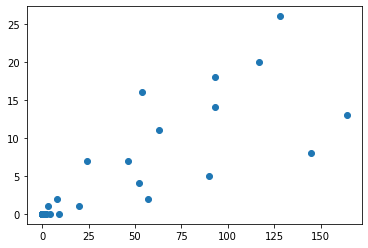

In [24]:
plt.scatter(df_padres['FB'], df_padres['HR'])

# ISLR (Ch 3): Linear Regression

Classic technique that is still powerful and serves as a starting point for newer approaches. Questions that can be addressed using the Advertising data from the previous chapter:

1. Is there a relationship between advertising budget and sales?
2. How string is the relationship between advertising budget and sales?
3. Which media contribute to sales?
4. How accurately can we estimate the effect of each medium on sales?
5. How accurately can we predict future sales?
6. Is the relationship linear?
7. Is there synergy among the advertising media? (interaction effect)


## Simple linear regression

We are seeking to predict Y on the basis of a single predictor variable X. It assumes there's an approximate linear relationship between X and Y.

$Y \approx \beta_0 + \beta_1X$

### Estimating the coefficients

Use least squarest to estimate. Find $\hat{\beta_0}$ and $\hat{\beta_1}$ such that the residual sum of squares (RSS) is minimized.

### Assessing the accuracy of the coefficient estimates

The true relationship between X and Y includes some $\epsilon$ which is a mean-zero random error term.

$Y = \beta_0 + \beta_1X$ + $\epsilon$

Note that we replace "approximately equal" with just "equal" when we have the error term. The error term $\epsilon$ is a catch-all for what we miss with the simple model. We typically assume that the error term is independent of X.

Remember that there is a true population regression line and that an regression line is a sample of that. Therefore there is some error associated with the regression line, consistent with standard statistical approaches of using a sample to estimate characteristics of a larger population. The analogy between linear regression and estimation of the mean of a random variable is an apt one based on the concept of *bias*. Just as $\hat\mu$ is an unbiased estimate of $\mu$, we can say the same for the linear regression coefficients we are estimating $\hat{\beta_0}$ and $\hat{\beta_1}$ for ${\beta_0}$ and ${\beta_1}$, respectively.

Continuing with the analogy of estimating the sample mean for our random variable Y, a natural question is how accurate is the sample mean $\hat\mu$ for $\mu$? We have established that the average of many $\hat\mu$ over many data sets will be very close to $\mu$, but that a single estimate $\hat\mu$ may be a substantial under- or overestimate of $\mu$. How far will that single estimate of $\hat\mu$ be? That is when we compute the *standard error*.

$Var(\hat\mu) = SE(\hat\mu)^2 = \frac{\sigma^2}{n}$

In a similar vein, we can calculate the standard errors associated with $\hat{\beta_0}$ and $\hat{\beta_1}$ using the following formulas:

$SE(\hat{\beta_0})^2 = \sigma^2[\frac{1}{n} + \frac{\bar{x}^2}{\Sigma(x_i-\bar{x}^2}]$

$SE(\hat{\beta_1})^2 = \sigma^2[\frac{1}{n} + \frac{\bar{x}^2}{\Sigma(x_i-\bar{x}^2}]$

Other key concepts:
- SEs can be used to compute confidence intervals, make hypothesis tests, apply t-statistics and get p-values.

#### (BL exercise) Understanding p-values

In [15]:
df_credit = pd.read_csv('ISLR_data/Credit.csv', index_col=0)
df_credit.head()

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1   14.891   3606     283      2   34         11    Male      No     Yes   
2  106.025   6645     483      3   82         15  Female     Yes     Yes   
3  104.593   7075     514      4   71         11    Male      No      No   
4  148.924   9504     681      3   36         11  Female      No      No   
5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
1  Caucasian      333  
2      Asian      903  
3      Asian      580  
4      Asian      964  
5  Caucasian      331

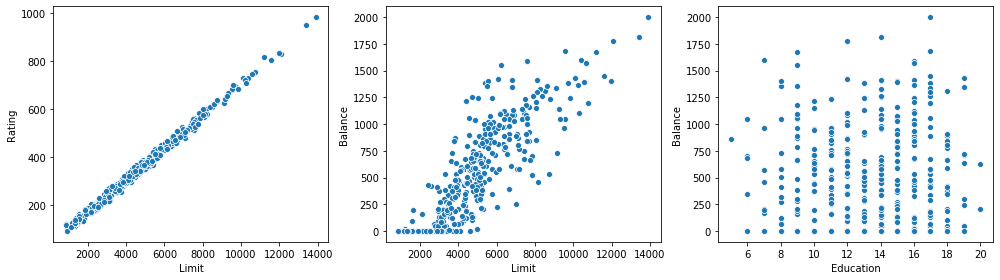

In [47]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
sns.scatterplot(x='Limit', y='Rating', data=df_credit, ax=ax1)
sns.scatterplot(x='Limit', y='Balance', data=df_credit, ax=ax2);
sns.scatterplot(x='Education', y='Balance', data=df_credit, ax=ax3)
plt.tight_layout();

##### Statsmodels method

In [31]:
import statsmodels.api as sm
# https://www.statsmodels.org/stable/regression.html
# https://www.statsmodels.org/stable/endog_exog.html

In [87]:
# endog=target, exog=features
X = df_credit['Limit'].values
y = df_credit['Rating'].values
X1 = sm.add_constant(X)   # Vector of 1s is needed

mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        18:32:28   Log-Likelihood:                -1568.1
No. Observations:                 400   AIC:                             3140.
Df Residuals:                     398   BIC:                             3148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4918      1.397     27.555      0.000      35.746      41.238
x1             0.0668      0.000    251.949      0.000       0.066       0.067
==============================================================================
Omnibus:                        7.074   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                5.177
Skew:                           0.155   Prob(JB):                       0.0751
Kurtosis:                       2.537   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
251.949**2

63478.29860100001

In [88]:
# endog=target, exog=features
X = df_credit['Limit'].values
y = df_credit['Balance'].values
X1 = sm.add_constant(X)   # Vector of 1s is needed

mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Tue, 05 May 2020   Prob (F-statistic):          2.53e-119
Time:                        18:32:29   Log-Likelihood:                -2748.0
No. Observations:                 400   AIC:                             5500.
Df Residuals:                     398   BIC:                             5508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -292.7905     26.683    -10.973      0.000    -345.249    -240.332
x1             0.1716      0.005     33.879      0.000       0.162       0.182
==============================================================================
Omnibus:                       22.506   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.676
Skew:                           0.418   Prob(JB):                     4.87e-08
Kurtosis:                       4.150   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
33.879**2

1147.786641

In [89]:
# endog=target, exog=features
X = df_credit['Education'].values
y = df_credit['Balance'].values
X1 = sm.add_constant(X)   # Vector of 1s is needed

mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02587
Date:                Tue, 05 May 2020   Prob (F-statistic):              0.872
Time:                        18:32:34   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        535.9662    101.814      5.264      0.000     335.805     736.127
x1            -1.1860      7.374     -0.161      0.872     -15.683      13.311
==============================================================================
Omnibus:                       28.655   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.467
Skew:                           0.584   Prob(JB):                     1.09e-06
Kurtosis:                       2.467   Cond. No.                         61.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
(-0.161)**2

0.025921000000000003

##### Scikit-learn method

In [57]:
from sklearn.linear_model import LinearRegression

In [81]:
X

array([[11],
       [15],
       [11],
       [11],
       [16],
       [10],
       [12],
       [ 9],
       [13],
       [19],
       [14],
       [16],
       [ 7],
       [ 9],
       [13],
       [15],
       [17],
       [15],
       [ 9],
       [ 9],
       [16],
       [17],
       [10],
       [ 8],
       [15],
       [16],
       [12],
       [16],
       [14],
       [16],
       [ 5],
       [16],
       [13],
       [10],
       [14],
       [12],
       [11],
       [ 9],
       [10],
       [14],
       [14],
       [15],
       [13],
       [14],
       [16],
       [12],
       [16],
       [15],
       [15],
       [13],
       [15],
       [20],
       [12],
       [10],
       [ 9],
       [ 8],
       [18],
       [14],
       [17],
       [17],
       [20],
       [10],
       [ 7],
       [17],
       [15],
       [14],
       [13],
       [16],
       [15],
       [14],
       [12],
       [12],
       [18],
       [15],
       [10],
       [16],
       [16],

In [65]:
np.array(X).reshape(-1, 1)

array([[11],
       [15],
       [11],
       [11],
       [16],
       [10],
       [12],
       [ 9],
       [13],
       [19],
       [14],
       [16],
       [ 7],
       [ 9],
       [13],
       [15],
       [17],
       [15],
       [ 9],
       [ 9],
       [16],
       [17],
       [10],
       [ 8],
       [15],
       [16],
       [12],
       [16],
       [14],
       [16],
       [ 5],
       [16],
       [13],
       [10],
       [14],
       [12],
       [11],
       [ 9],
       [10],
       [14],
       [14],
       [15],
       [13],
       [14],
       [16],
       [12],
       [16],
       [15],
       [15],
       [13],
       [15],
       [20],
       [12],
       [10],
       [ 9],
       [ 8],
       [18],
       [14],
       [17],
       [17],
       [20],
       [10],
       [ 7],
       [17],
       [15],
       [14],
       [13],
       [16],
       [15],
       [14],
       [12],
       [12],
       [18],
       [15],
       [10],
       [16],
       [16],

In [78]:
X1 = np.array(X).reshape(-1, 1)  # accomodate sklearn

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X1,y)

df_skl_coef = pd.DataFrame()
df_skl_coef['coefficients'] = [lin_reg.intercept_] + [lin_reg.coef_] #np.concatenate((lin_reg.intercept_, lin_reg.coef_.flatten()), axis=0)    # took a while to figure out how to format
df_skl_coef.index = ['constant'] + X.index #columns.tolist()
df_skl_coef

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [80]:
X

array([[11],
       [15],
       [11],
       [11],
       [16],
       [10],
       [12],
       [ 9],
       [13],
       [19],
       [14],
       [16],
       [ 7],
       [ 9],
       [13],
       [15],
       [17],
       [15],
       [ 9],
       [ 9],
       [16],
       [17],
       [10],
       [ 8],
       [15],
       [16],
       [12],
       [16],
       [14],
       [16],
       [ 5],
       [16],
       [13],
       [10],
       [14],
       [12],
       [11],
       [ 9],
       [10],
       [14],
       [14],
       [15],
       [13],
       [14],
       [16],
       [12],
       [16],
       [15],
       [15],
       [13],
       [15],
       [20],
       [12],
       [10],
       [ 9],
       [ 8],
       [18],
       [14],
       [17],
       [17],
       [20],
       [10],
       [ 7],
       [17],
       [15],
       [14],
       [13],
       [16],
       [15],
       [14],
       [12],
       [12],
       [18],
       [15],
       [10],
       [16],
       [16],

In [75]:
[lin_reg.intercept_] + [lin_reg.coef_]

[535.9662099050552, array([-1.18596356])]

In [68]:
lin_reg.coef_

array([-1.18596356])

### Assessing the accuracy of the model

TSS is the *total sum of squares*
<br>
TSS = $\Sigma(y_i - \bar{y_i})^2$

RSS is the *residual sum of squares*
<br>
RSS = $\Sigma(y_i - \hat{y_i})^2$


**Residual standard error**
- What is the formula for RSE?
- Based on the formula, can you tell for which term in the linear regression model it is a standard deviation?

**$R^2$ statistic**
- Is $R^2$ a number or proportion? Why? What is it a proportion of?
    - It's the proportion of variance in Y explained by the target.
    - It has the formula $R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}$



- What is the formula to calculate $R^2$?
- How does $R^2$ relate to the definition of correlation in a simple linear model? Can it be applied to a multiple linear regression problem?
 

## Multiple linear regression

This approach helps extend analysis to accomdate additional predictors. Each predictor (variable) is given a separate slope coefficient in a single model. **We interpret each coefficient $\beta_j$ as the average effect on the target $Y$ of a one unit increase in its associated feature $X_j$, holding all other features constant.** 

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$

### Estimating the regression coefficients

The parameters are estimated least squares. **Note that a feature can look significant when run alone in a simple linear regression but not significant in a multiple regression model! (In other words, the coefficients and p-values of a feature can be quite different between a simple and multiple regression model.)** Below are tables from the `Advertising` data described in the book (pg. 72).

<br>
<center> From Table 3.3: Simple regression of sales on newspaper </center>

| | Coefficient | SE | t-statistic | p-value |
|--|-------|---|-------|------- |
|intercept | 12.351 | 0.621 | 19.88 | <0.0001 |
|newspaper | 0.055 | 0.017 | 3.30 | 0.00115 |

<br>
<center> Table 3.4: Multiple regression model of sales </center>

| | Coefficient | SE | t-statistic | p-value |
|--|-------|---|-------|------- |
|intercept | 2.939 | 0.3119 | 9.42 | <0.0001 |
|TV        | 0.046 | 0.0014 | 32.91 | <0.0001 |
|radio     | 0.189 | 0.0086 | 21.89 | <0.0001 |
|newspaper | -0.001 | 0.0059 | -0.18 | 0.8599 |

How do we interpret this? For radio, as we see in Table 3.4, we would say that spending an additional \$1000 on radio advertising leads to an increase in sales by approximately 189 units (it is 1000 since the numbers are in thousands). (This is not too far off from its coefficient in the simple linear regression model data not shown.) But for newspaper, the regression coefficient was significantly non-zero in a simple regression model but very close to zero in the multiple regression model.

**How can this be?** This situation can be quite common. The difference stems from the fact that the slope term represents the average effect of a \$1000 increase in newspaper advertising, *ignoring* other predictors such as TV and radio. In contrast, in the multiple regression setting, the coefficient represent the average effect of increasing newspaper spending by \$1000 while holding TV and radio fixed.

**Does it make sense for the multiple regression to suggest no relationship between sales and newspaper while the simple linear regression implies the opposite?** It can. Consider a correlation matrix (not shown) that shows that there is a correlation between radio and newspaper of 0.35. This shows that there's a tendency to spend more on newspaper advertising in markets where more is spent on radio advertising. In a simple regression model where radio advertising is ignored, the newspaper advertising "gets credit" for the radio advertising even though newspaper ads are not really impacting sales. Newspaper sales are therefore just a surrogate for radio advertising in a simple regression model.

Here's a more extreme example to further illustrate the point. If you run a regression of shark attacks versus ice cream sales, you would see a positive correlation. But it would be absurd to ban ice cream sales to reduce the incidence of shark attacks. In reality, the higher temperatures cause more people to visit the beach, increasing both shark attacks and beach sales. A multiple regression of attacks versus ice cream sales and temperature reveals, as intuition implies, that the former predictor is no longer significant after adjusting for temperature.

### Some important questions

With multiple linear regression, we're usually interested in answering a few important questions.
1. Is at least one of the predictors useful in predicting the response?
2. Do all the predictors help to explain Y or is only a subset of the predictors useful?
3. How well does the model fit the data?
4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction?
5. Other: How does regularization impact the interpretation of coefficients?

**One: Is there a relationship between the response and predictors?**

In order to determine whether there's a relationship between the response(s) and predictor, we would do the following for each setting:

simple linear regression: check whether $\beta_1 = 0$
<br>
multiple linear regression: check whether $\beta_1 = \beta_2 = \beta_3 ... \beta_j = 0$

For the multiple linear regression setting, we can pose null and alternate hypotheses.
<br>
Null: All coefficients are equal to 0.
<br>
Alternate: At least *one* coefficients is non-zero.

The hypothesis test is performed by computing the F-statistic. (Note that this sounds very similar to ANOVA because it is, in fact, the same thing.)

$ F = \frac{(TSS - RSS)/p}{(RSS)/(n-p-1)} = \frac{variance\ across\ groups}{variance\ within\ groups} $

If the linear model assumptions are correct, one can show that:

$ E\{RSS/(n-p-1)\} = \sigma^2 $

and that, provided $H_0$ is true,

$ E\{(TSS-RSS)/p\} = \sigma^2 $

Therefore, when there's no relationship between the response and predictors, we can expect the F-statistic to take on a value close to 1. When the F-statistic is very large (as in the advertisements dataset), the p-values are small, providing compelling evidence against the null hypothesi. This suggests *at least one* of the features must be related to sales. But recall that there's a relationship between the degrees of freedom and the F-statistic (the F-distribution itself being the quotient of two chi-squared distributions). When n is large, a smaller F-statistic can still lead to rejection of the null hypothesis.

Sometimes we may want to test whether a particular subset of the coefficients are zero. In this case, we can have a second model that uses all variables *except q* variables. Suppose the residual sum of squares for that model is $RSS_0$. You can calculate the F-statistic for this new model.

$ F = \frac{(RSS_0 - RSS)/q}{(RSS)/(n-p-1)} $

In Table 3.4, for each individual predictor a t-statistic and a p-value were reported, to provide info about whether  each individual predictor is related to the response after adjusting for all other features. Interestingly, these are exactly equivalent to the F-test that omits that single variable from the model, leaving all the others in. (The square of each t-statistic is its corresponding F-statistic.) Therefore, it reports the partial effect of adding that variable to the model. For instance, as shown above, the p-values indicate that TV and radio are related to sales, but not newspaper in the presence of the other two.

Given that we can get the individual p-values for each variable, why do we need to look at the overall F-statistic? After all, if any of the p-values for the individual variables is very small, then we can say that at least one of the predictors is related to the response, right? No, and in short, because of multiple hypothesis testing. If the number of predictors/variables is very large, then you have the potential for one of the p-values from the individual t-statistics to find a significant variable by chance. The F-statistic approach does not suffer from this problem because it adjusts for the number of predictors.

The approach of using an F-statistic to test for an association between the predictors and response works when *p* is relatively small, and certainly small compared to *n*. But what happens if the number of predictors is larger compared to the number of samples? Then there are more coefficients to estimate than observations from which to estimate them and in this case, we cannot even fit the multiple linear regression model using least squares. The F-statistic cannot be used (and neither can most other concepts that we have seen so far in this chapter). When *p* is large, you might be able to use *forward selection*. A discussion of the *high-dimensional* setting is also discussed in Chapter 6.

**Two: Deciding on important variables**

We know that we can look at the F-statistic to see if there is at least *one* feature that significantly related to the response. We can look at p-values of each feature but if the number of features is large, we can make some false discoveries. We could apply a process of *variable* or *feature selection*. We can try different combinations of features but practically that would be time consuming. Instead, we can apply classical approaches for this task:

- *Forward selection*. Start with a null model, one that contains an intercept but no predictors. Then fit *m* simple linear regressions (m=number of features) and add to the null model the variable that results in the lowest RSS. Add a second variable that results in the lowest RSS for the next two-variable model. Keep doing this until some stopping rule is satisifed.
- *Backward selection*. Instead start with all variables in the model, then remove the variable with the largest p-value (least significant). Keep doing this until some stopping rule is reached (e.g. when the remaining variables have a p-value below some threshold.
- *Mixed selection*. A combination of forward and backward selection. Start with no variables in the model, then add variable that best fits like in forward selection. Keep adding until a variable added rises above a p-value threshold, then remove it. Continue performing forward and backward steps until all variables have a sufficiently low p-value and all variables outside the model would have a large p-value if added to the model. (*Not entirely sure I understand this.*)

Note: Backward selection cannot be used if m > n, while forward selection can always be used. Forward selection is a greedy approach, and might include variables early that later become redundant. Mixed selection can remedy this.

More detail about this is discussed in Chapter 6.

**Three: Model fit**

Two of the most common numerical measures of model fit are the RSE and $R^2$, the fraction of variance explained. Recall that in simple regression, $R^2$is the square of the correlation of the response and the variable. In multiple linear regression, it equals $Cor(Y, \hat{Y})^2$, the square of the correlation between the response and the fitted linear model; in fact one property of the fitted linear model is that it maximizes thsi correlation among all possible linear models.

An $R^2$ close to 1 indicates that the model explains a large portion of the variance in the response variable. This is true even in the Advertising data where using all three variables gives an $R^2$ of 0.8972 while omitting newspaper gives $R^2$ of 0.89719. There's a small increase when we include newspaper even though we know that the p-value for newspaper advertising is not significant. It turns out that $R^2$ will always increase when more variables are added to the model, even if those variables are only weakly associated with the response. In contrast, when using only TV, the $R^2$ was 0.61 and adding radio leads to a substantial improvement. We can further quantify this improvement by looking at the p-value for the radio coefficient in a model that contains only TV and radio as predictors.
  
What about RSE? The model that contains only TV and radio has an RSE of 1.681 while including newspaper has one of 1.686. How can RSE increase when newspaper is added given that RSS must decrease? In general, RSE is defined as:
    <br>
    $RSE = \sqrt{\frac{1}{n-p-1}RSS}$
    <br>
Thus, models with more variables can have higher RSE if the decrease in RSS is small relative to the increase in m. The square root in the equation means that an added or removed feature will impact RSS and RSE in a non-linear fashion.

Plotting the data also helps. Graphical summaries can reveal problems with a model that are not visible from numerical statistics. In the 3D plot, some observations lie below the least squares regression plane while some are above. It overestimates sales for instances in which most of the advertising money is spent exclusively on either TV or radio while underestimating sales when the budget was split between the two media. The pronounced non-linear pattern cannot be modeled accurately using linear regression. It suggests a *synergy* or *interaction* effect between the advertising media, whereby combining the media together results in a bigger boost to sales than using any single medium. Later we'll discuss accomdating synergistic effects through the use of interaction terms.
    
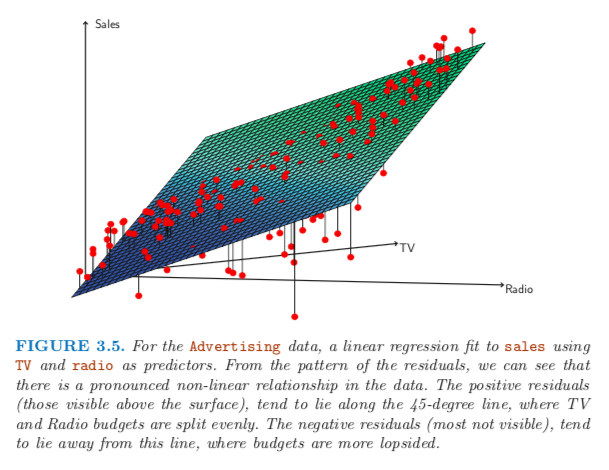

RSE = residual standard error (looks same? as root mean square error)
<br>
RSS = residual sum of squares (looks same? as mean square error)


**Four: Predictions**

Once we have fit the multiple regression model, it is straightforward to apply the equation to predict the response *Y* on the basis of a set fo values for the predictors $X_1, X_2,...X_p$. However, there are three sorts of uncertainty associated with this prediction.

1. The coefficient estimates ${\hat\beta_0}$, ${\hat\beta_1}$,... ${\hat\beta_m}$ are only estimates for ${\beta_0}$, ${\beta_1}$,... ${\beta_m}$. The *least squares plane* is only an estimate for the *true population regression plane.* The inaccuracy in the coefficient estimates is related to the *reducible error* from Chapter 2. We can compute a *confidence interval* in order to determine how close $\hat{Y}$ will be to *f(X)*.

2. Even if we knew the true values, the response value cannot be predicted perfectly because of the random error $\epsilon$ in the model (the irreducible error). How much will $Y$ vary from $\hat{Y}$? We use *prediction intervals* to answer this question. Prediction intervals are always wider than confidence intervals, because they incorporate both the error in the estimate for f(X) (the reducible error) and the uncertainty as to how much an individual point will differ from the population regression plane (the irreducible error).
    - Confidence interval: use to quantify the uncertainty surrounding the average sales over a large number of cities (given that 100K and 20K is spent on TV and radio in each city, the CI for sales could be (10985, 11528))
    - Prediction interval: use to quantify the uncertainty surrounding sales for a particular city (given that 100K and 20K is spent on TV and radio in a particular city, the PI for sales could be (7930, 14580))

Note that both intervals are centered at 11256 but that the prediction interval is substantially wider tha the confidence interval, reflecting the increased uncertainty about sales for a given city in comparison to the average sales over many locations.

**Other: Interpret the coefficients in both the simple and multiple regression setting. How much would we expect an additional \$1000 of advertising spending in each category to increase sales?**

## Other considerations in the regression model

### Qualitative predictors

Suppose we evaluate the Credit data set, which has balance and quantitative predictors like age, education, income, etc. There are also qualitative predictors like gender, student status, and ethnicity.

**Predictors with only two levels**

Suppose we're looking at gender and we arbitrarily code male as 0 and female as 1. 

For the female, the equation would look like this: $y_i = \beta_0 + \beta_1x_1$
<br>
For the male, the equation would look like this: $y_i = \beta_0$

The choice of coding is arbitrary, it is just how we interpret the coefficients.

**Predictors with more than two levels**

In this situation, we can basically apply one-hot encoding. Let's say that we want to use the ethnicity variable where we can have three ethnicities, Asian, Caucasian, and African-American.

The equation would look like this:

$y_i = \beta_0 + \beta_1x_1 + \beta_2x_2$

We would have dummy variables for Asian and Caucasian:

$x_{i1}$ = 1 if ith person is Asian, 0 if not
    
$x_{i2}$ = 1 if ith person is Caucasian, 0 if not

where:
- $\beta_0 + \beta_1$ if ith person is Asian
- $\beta_0 + \beta_2$ if ith person is Caucasian
- $\beta_0$ if ith person is African-American

In this case, here's how we would interpret the coefficients:

- $\beta_0$ is the average credit card balance for African-Americans
- $\beta_1$ is the difference in average credit card balance between the Asian and African-American categories
- $\beta_2$ is the difference in average credit card balance between the Caucasian and African-American categories


There will always be one fewer dummy variables than the number of variables. The level with no dummy variable (African-American in this example) is known as the baseline.

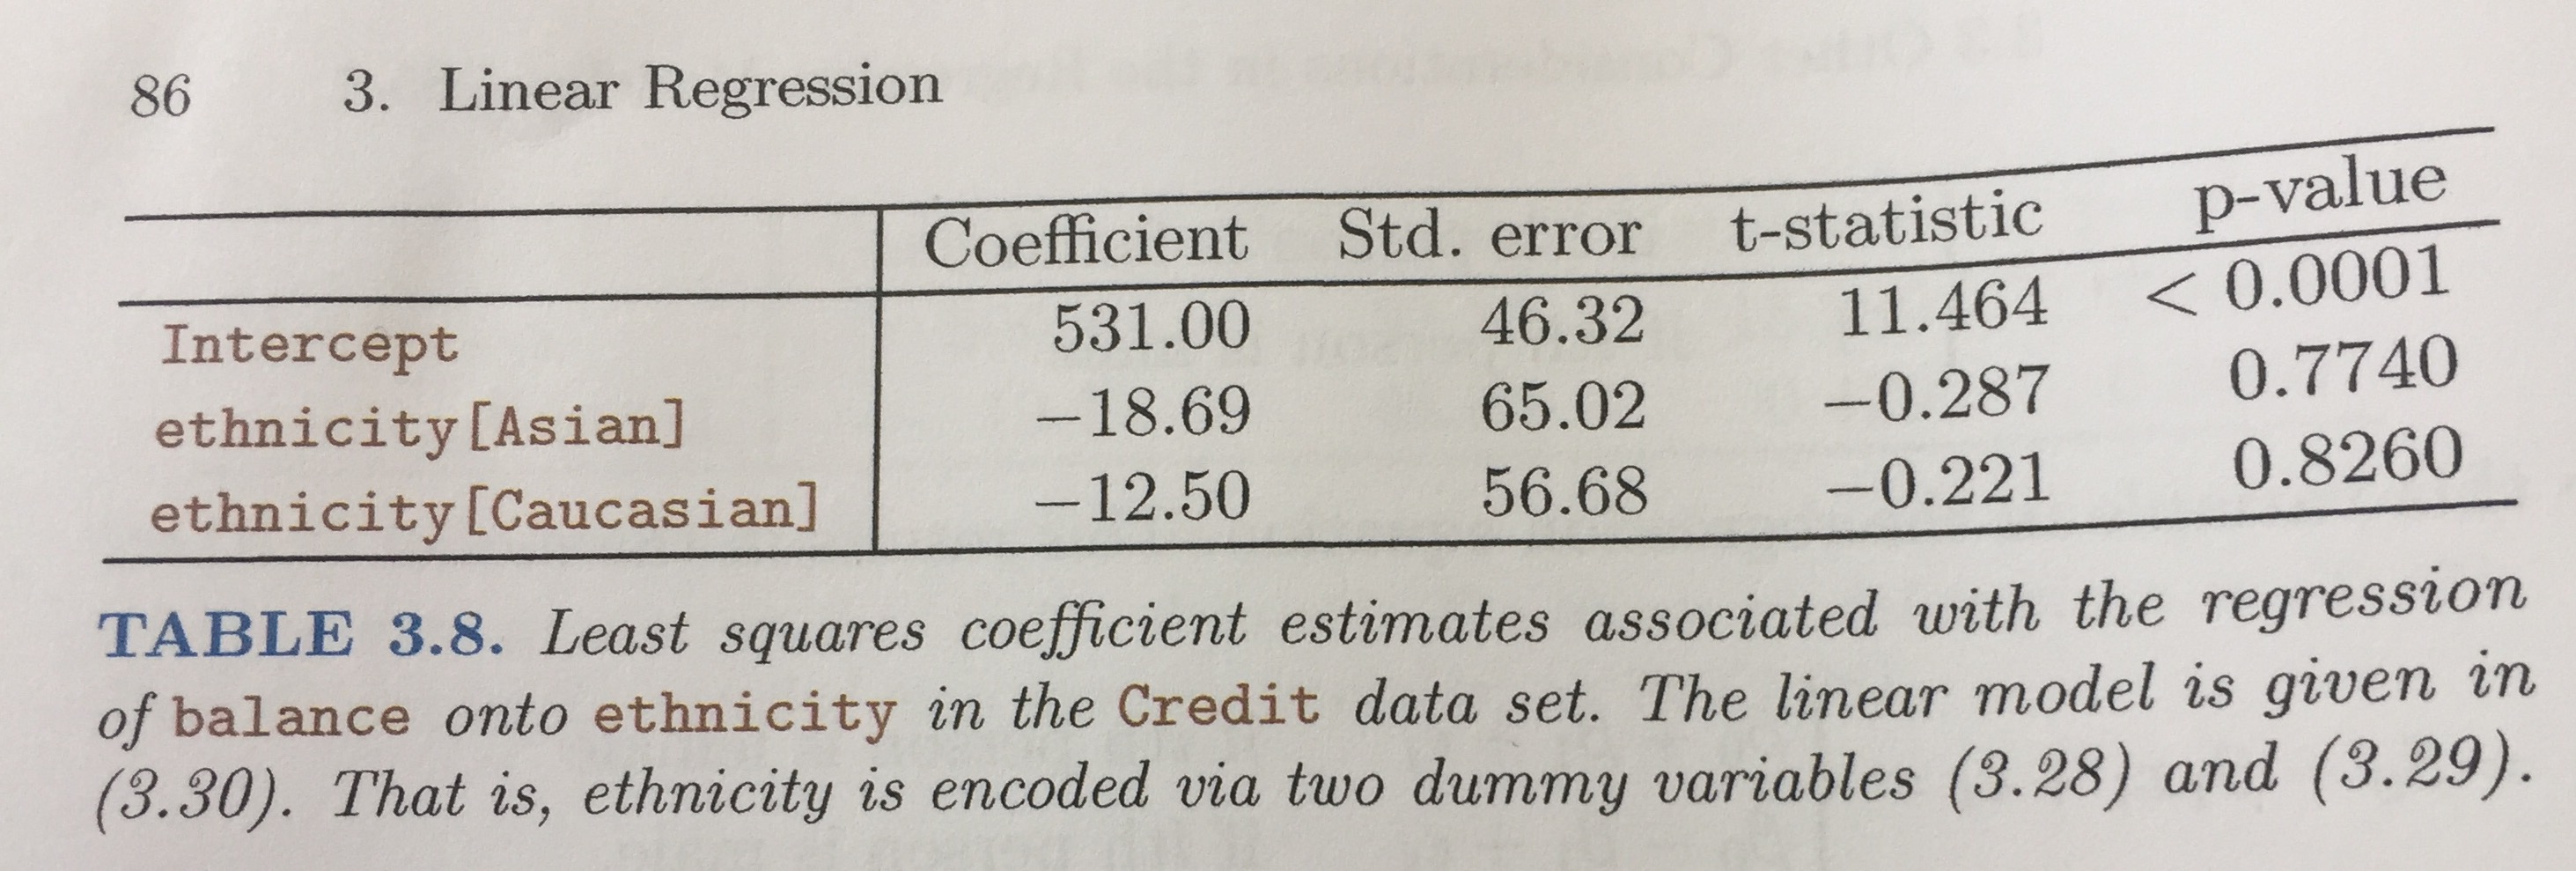

From the above table, we'd estimate the balance baseline (African American) as USD 531. Asian category will have 18.69 less debt than the African American category and the Caucasian category will have 12.50 less debt than the African American. However, if you look at the p-values, it suggests no statistical evidence of a real difference in credit card balance between ethnciities.

Again, the level selected as the baseline category is arbitrary and the final predictions for each group will be the same regardless of choice. But the coefficients and p-values do depend on the choice of dummy variable coding. You can do an F-test to test the null hypothesis that $\beta_1 = \beta_2 = 0$ which does not depend on the coding. In this case, the F-test has a value of 0.96 meaning you can't reject the null hypothesis that there is no relationship between balance and ethnicity.

There are different ways of coding qualitative variables besides the dummy variable approach taken here. All of these approaches lead to equivalent model fits, but the coefficients are different and have different interpretations and are designed to measure particular *contrasts*. The topic is beyond the scope of the book.

### Extensions of the linear model

The standard linear regression model provides interpretable results and works quite well on many real-world problems. However, it makes several highly restrictive assumptions that are often violated in practice. Two of the most important assumptions are:
1. The relationship between the predictors and response are *additive*
2. The relationship between the predictors and response are *linear*

*Additive* assumption: means that the effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors.

*Linear* assumption: means that the change in the response $Y$ due to a one-unit change in $X_j$ is constant, regardless of the value of $X_j$.

**Q:** What are alternative, sophisticated approaches to the linear model that does not have to deal with these assumptions?

#### Removing the additive assumption

In the Advertising models described earlier, we concluded that both TV and radio seem to be associated with sales. One of the models state that the average effect on sales of a one-unit increase in TV is always $\beta1$, regardless of the amount spent on radio.

But this simple model may not be correct. Suppose that there's an *interaction effect* such that spending money on radio actually increases the effectiveness of TV advertising, so that the slope term for TV should increase as radio increases. This is observed in Figure 3.5.

One way to alter the model is to include a third predictor, an *interaction term*, which is constructed by computing the product of $X_1$ and $X_2$. This results in the model:

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2$

How does inclusion of this interaction term relax the additive assumption? Note that this equation can be written as:

$Y = \beta_0 + (\beta_1 + \beta_3X_2)X_1 + \beta_2X_2$
$Y = \beta_0 + \tilde{\beta}_1X_1 + \beta_2X_2 $

where $\tilde{\beta}_1 = (\beta_1 + \beta_3X_2)$

In this case, you can see how the effect of $X_1$ on $Y$ is no longer constant: adjusting $X_2$ will change the impact of $X_1$ on $Y$.

An example where this might be more clear is looking at the impact of the number of workers and the number of production lines on a factory's productivity. It's clear that increasing the number of lines won't really matter if there aren't any workers to operate the lines.

Let's look again at the advertising data and the results.

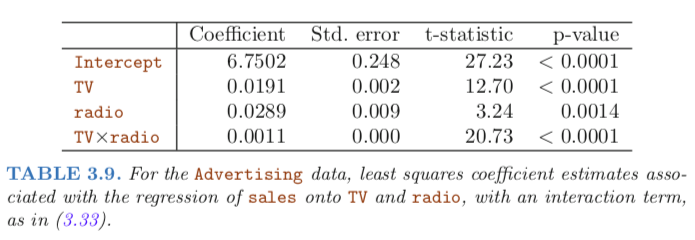

The table suggests that the model that includes the interaction term is superior to the model that contains only the *main effects*. The p-value for the interaction term, TVxradio, is extremely low, indicating that there is strong evidence for $H_a \neq 0$. In other words, the true relationship is not additive.

If the $R^2$ for the model with the interaction term is 96.8% while the model while the model that predicts sales with TV and radio without the interaction term is 89.7%, how much of the variability in sales after fitting the additive model has been explained by the interaction term?
<br>
(96.8-89.7)/(100-89.7) = 69%

The coefficient estimates in Table 3.9 suggest that an increase in TV advertising of USD 1000 is associated with increased sales of $(\beta_1 + \beta_3radio) \times 1000$ = 19 + 1.1 x radio units.

In this example, all the p-values are significant, but what would we do if the interaction term has a small p-value, but the associated main effects do not? We would still leave them in because the *hierarchical principle* states that *if we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant.*

The concept of interactions can apply to qualitative variables or a combination of quantitative and qualitative variables. In fact, a mix of quantiative and qualitative can have a particularly nice interpretation. Consider the Credit dataset and see how a model looks if we consider an interaction between whether one is a student (a qualitative variable) and income (a quantitative variable).

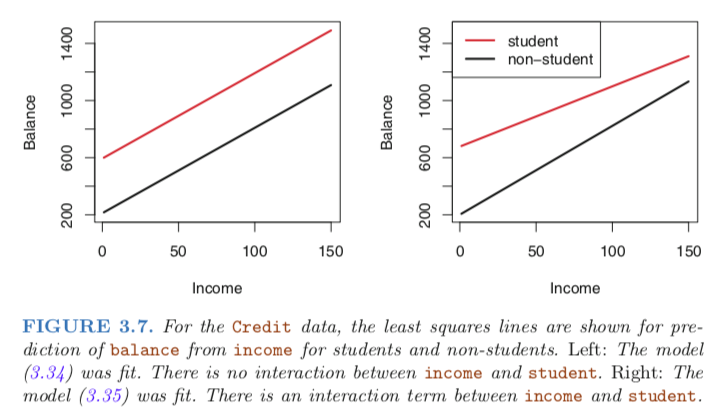

In both models (with and without an interaction term), there are two different regression lines, one for a student and one for a non-student. But when there is an interaction trem, we now see that the regression lines have a different slopes as well as intercepts. We can see that the slope for students is lower than the slope for non-students. This suggests that increases in income are associated with smaller increases in credit card balance among students as compared to non-students.

**This could be relevant to my school study. Whether a community is urban or rural might "interact" with other variables like enrollment or something else "actionable".**

#### Adding an interaction term using sklearn

[Albon tutorial](https://chrisalbon.com/machine_learning/linear_regression/adding_interaction_terms/)
<br>
[Sklearn preprocessing polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [3]:
# Load libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df_credit = pd.read_csv('ISLR_data/Credit.csv', index_col=0)
df_credit.head()

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1   14.891   3606     283      2   34         11    Male      No     Yes   
2  106.025   6645     483      3   82         15  Female     Yes     Yes   
3  104.593   7075     514      4   71         11    Male      No      No   
4  148.924   9504     681      3   36         11  Female      No      No   
5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
1  Caucasian      333  
2      Asian      903  
3      Asian      580  
4      Asian      964  
5  Caucasian      331

In [5]:
# Replace variables
X = df_credit[['Income', 'Student']]
X['Student'].replace('No', 0, inplace=True)
X['Student'].replace('Yes', 1, inplace=True)
y = df_credit['Balance']

/Users/lacar/anaconda/envs/insight/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [6]:
X.head()

Income  Student
1   14.891        0
2  106.025        1
3  104.593        0
4  148.924        0
5   55.882        0

**No interaction term**

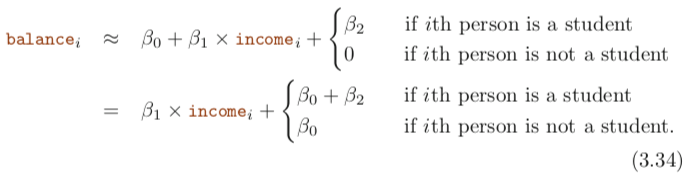


In [60]:
# Create model and fit
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
# Coefficients
b1_noint, b2_noint = lin_reg.coef_

# Intercept term
b0_noint = lin_reg.intercept_

print('beta0 (intercept): {0:0.2f} \nbeta1 (income): {1:0.2f} \nbeta2 (student): {2:0.2f}'.format(b0_noint, b1_noint, b2_noint))

beta0 (intercept): 211.14 
beta1 (income): 5.98 
beta2 (student): 382.67


In [77]:
# Generate values
income_vals = np.arange(0, 150, 10)
bal_student0_noint =  b1_noint*income_vals + b0_noint + b2_noint*0 # not a student
bal_student1_noint =  b1_noint*income_vals + b0_noint + b2_noint*1 # is a student

**With interaction term**

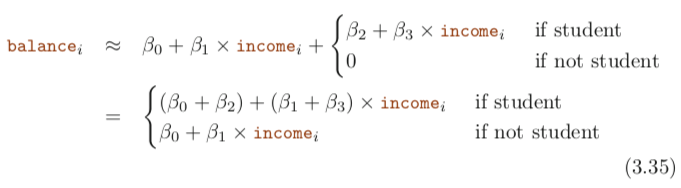

Another way of writing above to show explicitly how the interaction term goes away when the ith sample is not a student.


If a student:
$balance_i = \beta_0 + \beta_1 \times income_i + \beta_2 \times (1) + \beta_3  \times (income)(1)$    
<br>
If not a student:
$balance_i = \beta_0 + \beta_1 \times income_i + \beta_2 \times (0) + \beta_3  \times (income)(0)$   

In [30]:
# Create interaction term (not polynomial features)
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)

In [32]:
X_inter

array([[ 14.891,   0.   ,   0.   ],
       [106.025,   1.   , 106.025],
       [104.593,   0.   ,   0.   ],
       ...,
       [ 57.872,   0.   ,   0.   ],
       [ 37.728,   0.   ,   0.   ],
       [ 18.701,   0.   ,   0.   ]])

**Note how the third column is a straight multiplication of the first and second column. It effectively zeros out the interaction term (making the value of the beta3 coefficient irrelevant as shown in the equations above and below).**

In [33]:
# Create model and fit
lin_reg_inter = LinearRegression()
lin_reg_inter.fit(X_inter, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lin_reg_inter.coef_

array([  6.21816874, 476.67584321,  -1.99915087])

In [81]:
# Coefficients
b1_int, b2_int, b3_int = lin_reg_inter.coef_

# Intercept term
b0_int = lin_reg_inter.intercept_

print('beta0 (intercept): {0:0.2f} \nbeta1 (income): {1:0.2f} \nbeta2 (student): {2:0.2f} \nbeta3 (income x student): {3:0.2f}'.format(b0_int, b1_int, b2_int, b3_int))

beta0 (intercept): 200.62 
beta1 (income): 6.22 
beta2 (student): 476.68 
beta3 (income x student): -2.00


In [94]:
# Generate values
income_vals = np.arange(0, 150, 10)
bal_student0_int =  (b0_int + b2_int*0) + ((b1_int + b3_int*0)*income_vals) # not a student
bal_student1_int =  (b0_int + b2_int*1) + ((b1_int + b3_int*1)*income_vals) # is a student

**Visualization with and without interaction term**

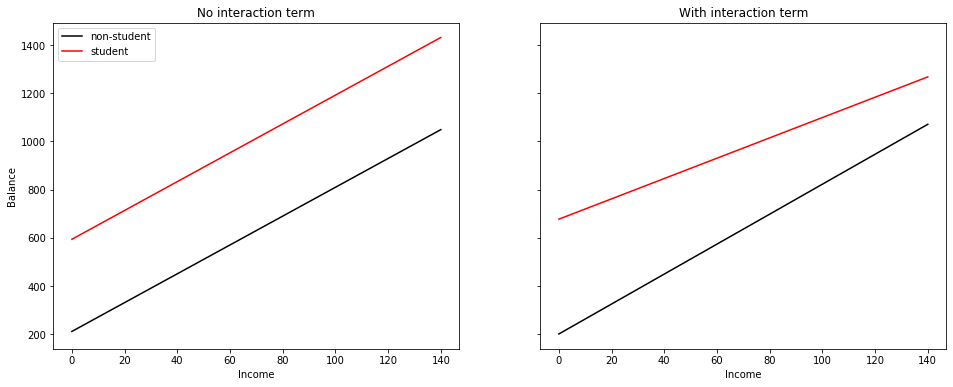

In [98]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)


ax1.plot(income_vals, bal_student0_noint, color='k', label='non-student')
ax1.plot(income_vals, bal_student1_noint, color='r', label='student')

ax1.set_title('No interaction term')
ax1.set_xlabel('Income')
ax1.set_ylabel('Balance')
ax1.legend()


ax2.plot(income_vals, bal_student0_int, color='k')
ax2.plot(income_vals, bal_student1_int, color='r')
ax2.set_title('With interaction term')
ax2.set_xlabel('Income');

#### Non-linear relationships

The linear regression model assumes a linear relationship between the response and predictors. But in some case, the true relationship may be non-linear. One way this can be remedied by using *polynomial regression*. (We'll explore more complex approaches for performing non-linear fits in more general settings in later chapters.) Here is one example from the Auto data set.

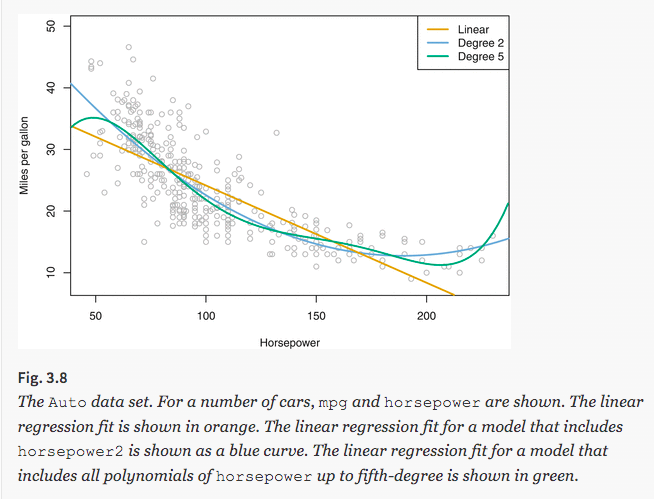

The points in Figure 3.8 seem to have a quadratic shape, suggesting that a model of the form:

$$ "mpg" = \beta_0 + \beta_1 \times horsepower + \beta_2 \times horsepower^2 + \epsilon $$

may be a better fit. This is still a linear model with $X_1 = horsepower$ and $X_2 = horsepower^2$ and the quadratic fit $R^2$ value (0.688) is better than without the quadratic term (0.606). The p-value for the term is also significant.

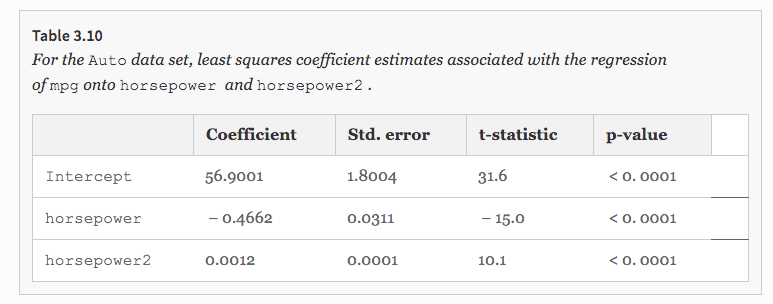

We don't want to necessarily increase the polynomial degree terms if it does not improve fit.



### Potential problems

1. Non-linearity of the response-predictor relationships
2. Correlation of error terms
3. Non-constant variance of error terms
4. Outliers
5. High-leverage points
6. Collinearity

#### Non-linearity of the data

Use **residual plots** where the residuals,
<br>
$e_i = y_i - \hat{y_i}$.

The presence of a pattern may indicate a problem with some aspect of the linear model. In multiple linear regression, use the predicted (fitted) values of y on the x-axis.

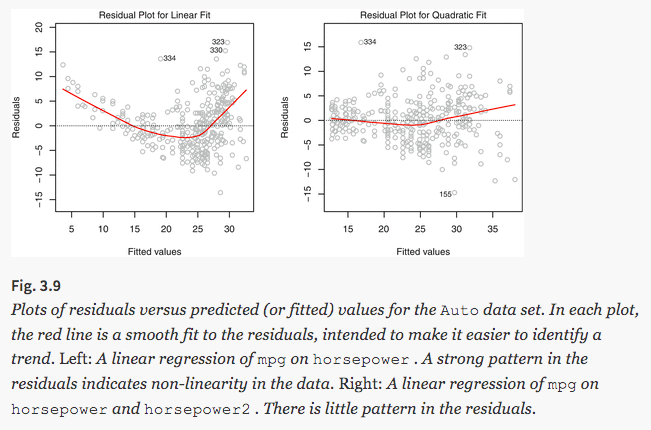

If the residual plot indicates non-linear associations in the data, how can we address this? One simple approach is to use **non-linear transformations of the predictors X**, such as:
- $log X$
- $\sqrt{X}$
- $X^2$

#### Correlation of error terms

An important assumption of the linear regression model is that the error terms, ε1, ε2, …, ε n , are uncorrelated. What does this mean? For instance, if the errors are uncorrelated, then the fact that ε i is positive provides little or no information about the sign of εi + 1. 

If in fact there is correlation among the error terms, then the estimated standard errors will tend to underestimate the true standard errors. As a result, confidence and prediction intervals will be narrower than they should be. For example, a 95 % confidence interval may in reality have a much lower probability than 0. 95 of containing the true value of the parameter. In addition, p-values associated with the model will be lower than they should be; this could cause us to erroneously conclude that a parameter is statistically significant. In short, **if the error terms are correlated, we may have an unwarranted sense of confidence in our model.**

As an extreme example, suppose we accidentally doubled our data, leading to observations and error terms identical in pairs. If we ignored this, our standard error calculations would be as if we had a sample of size 2n, when in fact we have only n samples. Our estimated parameters would be the same for the 2n samples as for the n samples, but the confidence intervals would be narrower by a factor of $\sqrt{2}$!

Why might correlations among the error terms occur? Such correlations frequently occur in the context of time series data, which consists of observations for which measurements are obtained at discrete points in time.

If the error terms are positively correlated, then we may see tracking in the residuals—that is, adjacent residuals may have similar values. The bottom plot below shows evidence of tracking while the top plot does not.


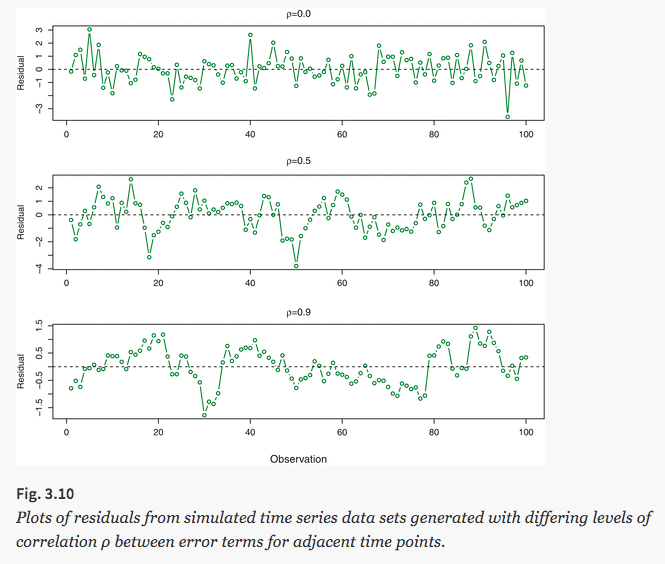

#### Non-constant variance of error terms

This is identifying the presence of heteroscedasticity. 

An important assumption of the linear regression model is that the error terms have a constant variance. The standard errors, confidence intervals, and hypothesis tests associated with the linear model rely upon this assumption. Unfortunately, it's often the case that the error terms are non-constant. This can be identified in plots if there is a pattern like a funnel, such as in the left panel shown below. Often **transformation of the response Y** using a concave function such as $log Y$ or $\sqrt{Y}$ can help solve this (right panel).

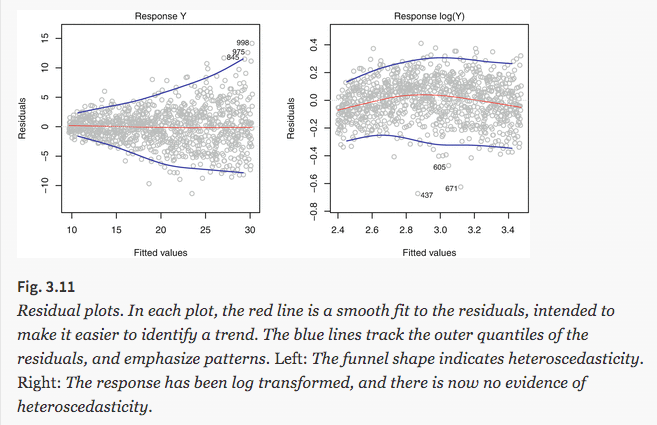

Sometimes we have a good idea of the variance of each response. For example, the ith response could be an average of $n_i$ raw observations. If each of these raw observations is uncorrelated with variance $\sigma^2$, then their average has variance $\sigma_i^2 = \sigma^2/n_i$. In this case, a simple remedity is to fit our model by *weighted least squares* with weights proportional to the inverse variances.

**Come back to this, don't understand this fully.**

#### Outliers

Outliers may not have a great affect on the actual least squares regression line (slope and intercept likely won't change), but it will have an effect on RSE. This can be problematic since RSE is used to compute all confidence intervals and p-values and therefore a single outlier cna have implications for interpretation of the fit. The outlier will also affect $R^2$.

Residual plots can be used to identify outliers, particularly *studentized residuals*, which are computed by dividing each residual $e_i$ by its estimated standard error (right-most panel below). Observations whose studentized residuals are greater than 3 in absolute value are possible outliers.





#### Multicollinearity

Collinearity refers to the situation in which two or more predictor variables are closely related to one another...The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response.... Since collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for $\hat{\beta}_j$ to grow. Recall that the t-statistic for each predictor is calculated by dividing $\hat{\beta}_j$ by its standard error. Consequently, collinearity results in a decline in the t-statistic. As a result, in the presence of collinearity, we may fail to reject H0 : $\hat{\beta}_j$ = 0. This means that the power of the hypothesis test—the probability of correctly detecting a non-zero coefficient—is reduced by collinearity.

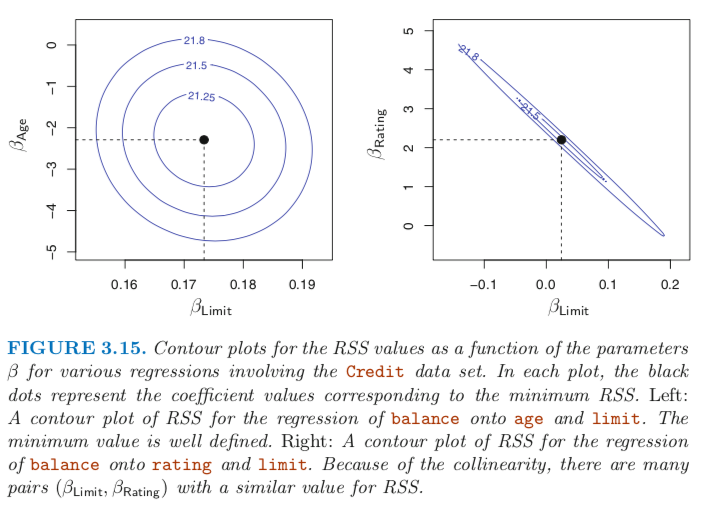


In the right panel, a small change in the data could cause the pair of coefficient values that yield the smallest RSS—that is, the least squares estimates—to move anywhere along this valley. This results in a great deal of uncertainty in the coefficient estimates. Notice that the scale for the limit coefficient now runs from roughly −0.2 to 0.2; this is an eight-fold increase over the plausible range of the limit coefficient in the regression with age.

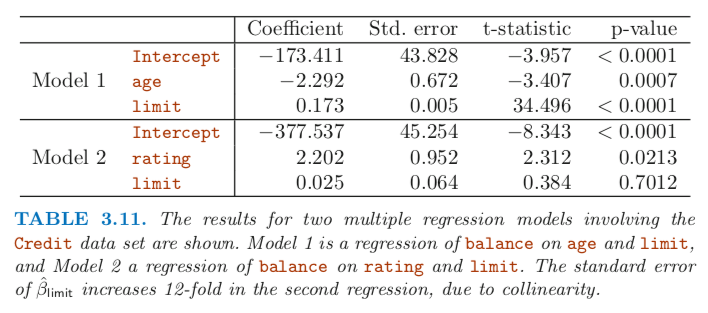


This means that the power of the hypothesis test—the probability of correctly detecting a non-zero coefficient—is reduced by collinearity.

A simple way to detect collinearity is to look at the correlation matrix of the predictors. An element of this matrix that is large in absolute value indicates a pair of highly correlated variables, and therefore a collinearity problem in the data. Unfortunately, not all collinearity problems can be detected by inspection of the correlation matrix: it is possible for collinear- ity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation multicollinearity. Instead of inspecting the correlation matrix, a better way to assess multi- collinearity is to compute the variance inflation factor (VIF). The VIF is the ratio of the variance of $\hat{\beta}_j$ when fitting the full model divided by the variance of $\hat{\beta}_j$ if fit on its own. The smallest possible value for VIF is 1, which indicates the complete absence of collinearity. Typically in practice there is a small amount of collinearity among the predictors. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity. The VIF for each variable can be computed using the formula:

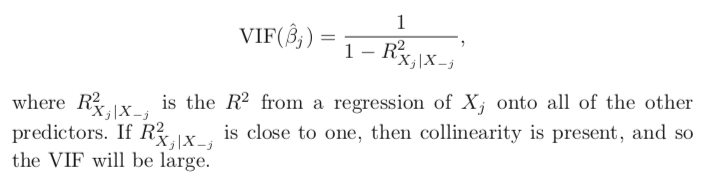



Solutions to deal with multicollinearity:
1. Drop one of the correlated features.
2. Combine the collinear variables together into a single predictor. For instance, we might take the average of standardized versions of limit and rating in order to create a new variable that measures credit worthiness.


##### Calculating VIF with statsmodels

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf       # method 1 to do OLS, constant already added (vector of 1s)
import statsmodels.api as sm                # method 2 to do OLS, need to add constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
# Different ways to do OLS with statsmodels
# https://stackoverflow.com/questions/30650257/ols-using-statsmodel-formula-api-versus-statsmodel-api

In [39]:
df_credit.head()

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1   14.891   3606     283      2   34         11    Male      No     Yes   
2  106.025   6645     483      3   82         15  Female     Yes     Yes   
3  104.593   7075     514      4   71         11    Male      No      No   
4  148.924   9504     681      3   36         11  Female      No      No   
5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
1  Caucasian      333  
2      Asian      903  
3      Asian      580  
4      Asian      964  
5  Caucasian      331

In [40]:
X_nocorr = df_credit[['Balance', 'Age', 'Limit']]
X_nocorr.head()

Balance  Age  Limit
1      333   34   3606
2      903   82   6645
3      580   71   7075
4      964   36   9504
5      331   68   4897

In [47]:
# Multiregression 1
lm1 = smf.ols(formula='Balance ~ Age + Limit', data=X_nocorr).fit()
variables1 = lm1.model.exog
variables1

array([[1.000e+00, 3.400e+01, 3.606e+03],
       [1.000e+00, 8.200e+01, 6.645e+03],
       [1.000e+00, 7.100e+01, 7.075e+03],
       ...,
       [1.000e+00, 6.700e+01, 4.171e+03],
       [1.000e+00, 4.400e+01, 2.525e+03],
       [1.000e+00, 6.400e+01, 5.524e+03]])

In [43]:
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[14.457994503414344, 1.010283037303587, 1.010283037303587]

In [44]:
X_corr = df_credit[['Balance', 'Age', 'Rating', 'Limit']]

# multiregression
lm = smf.ols(formula='Balance ~ Age + Rating + Limit', data=X_corr).fit()
variables = lm.model.exog
variables

array([[1.000e+00, 3.400e+01, 2.830e+02, 3.606e+03],
       [1.000e+00, 8.200e+01, 4.830e+02, 6.645e+03],
       [1.000e+00, 7.100e+01, 5.140e+02, 7.075e+03],
       ...,
       [1.000e+00, 6.700e+01, 3.210e+02, 4.171e+03],
       [1.000e+00, 4.400e+01, 1.920e+02, 2.525e+03],
       [1.000e+00, 6.400e+01, 4.150e+02, 5.524e+03]])

In [46]:
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[23.80295451367821, 1.0113846860681328, 160.66830095856935, 160.59287978597942]

# [bottom of notebook]